## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.783059 -1.690823  1.850266 -0.362656 -0.670106 -0.727552
1  0.652740  0.674791 -0.986271 -0.024675 -0.797072  0.770838
2  0.293910  0.751137 -0.019621 -0.627112 -0.500560  0.040063
3  1.294416  0.216280  1.321396 -1.310475  1.650593  0.799643
4  0.055812  0.576744  0.095316 -1.580944 -1.459867 -0.919836


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9600414	total: 58.1ms	remaining: 58s
1:	learn: 0.9499991	total: 58.6ms	remaining: 29.2s
2:	learn: 0.9390586	total: 59.2ms	remaining: 19.7s
3:	learn: 0.9298198	total: 59.7ms	remaining: 14.9s
4:	learn: 0.9210353	total: 60.3ms	remaining: 12s
5:	learn: 0.9123510	total: 60.7ms	remaining: 10.1s
6:	learn: 0.9024300	total: 61.1ms	remaining: 8.67s
7:	learn: 0.8930899	total: 61.6ms	remaining: 7.64s
8:	learn: 0.8856178	total: 62.1ms	remaining: 6.83s
9:	learn: 0.8750198	total: 62.5ms	remaining: 6.19s
10:	learn: 0.8671097	total: 63ms	remaining: 5.67s
11:	learn: 0.8574560	total: 63.5ms	remaining: 5.23s
12:	learn: 0.8487864	total: 64ms	remaining: 4.86s
13:	learn: 0.8412549	total: 64.5ms	remaining: 4.54s
14:	learn: 0.8349847	total: 64.9ms	remaining: 4.26s
15:	learn: 0.8266140	total: 65.3ms	remaining: 4.02s
16:	learn: 0.8191834	total: 65.8ms	remaining: 3.8s
17:	learn: 0.8119525	total: 66.3ms	remaining: 3.62s
18:	learn: 0.8040663	total: 66.7ms	remaining: 3.45s
1

104:	learn: 0.3916438	total: 105ms	remaining: 892ms
105:	learn: 0.3884863	total: 105ms	remaining: 887ms
106:	learn: 0.3858322	total: 106ms	remaining: 882ms
107:	learn: 0.3835209	total: 106ms	remaining: 877ms
108:	learn: 0.3809433	total: 107ms	remaining: 871ms
109:	learn: 0.3779257	total: 107ms	remaining: 866ms
110:	learn: 0.3742949	total: 107ms	remaining: 861ms
111:	learn: 0.3716072	total: 108ms	remaining: 856ms
112:	learn: 0.3686120	total: 108ms	remaining: 851ms
113:	learn: 0.3660821	total: 109ms	remaining: 846ms
114:	learn: 0.3627160	total: 109ms	remaining: 842ms
115:	learn: 0.3592602	total: 110ms	remaining: 837ms
116:	learn: 0.3559137	total: 110ms	remaining: 833ms
117:	learn: 0.3532848	total: 111ms	remaining: 829ms
118:	learn: 0.3508558	total: 111ms	remaining: 825ms
119:	learn: 0.3483574	total: 112ms	remaining: 820ms
120:	learn: 0.3462162	total: 112ms	remaining: 816ms
121:	learn: 0.3433696	total: 113ms	remaining: 810ms
122:	learn: 0.3406715	total: 113ms	remaining: 806ms
123:	learn: 

271:	learn: 0.1200515	total: 185ms	remaining: 496ms
272:	learn: 0.1190343	total: 186ms	remaining: 495ms
273:	learn: 0.1183849	total: 186ms	remaining: 494ms
274:	learn: 0.1177039	total: 187ms	remaining: 493ms
275:	learn: 0.1169017	total: 187ms	remaining: 492ms
276:	learn: 0.1164294	total: 188ms	remaining: 491ms
277:	learn: 0.1155577	total: 189ms	remaining: 490ms
278:	learn: 0.1146433	total: 189ms	remaining: 489ms
279:	learn: 0.1136918	total: 190ms	remaining: 488ms
280:	learn: 0.1128645	total: 190ms	remaining: 487ms
281:	learn: 0.1120299	total: 191ms	remaining: 486ms
282:	learn: 0.1112558	total: 191ms	remaining: 485ms
283:	learn: 0.1103434	total: 192ms	remaining: 484ms
284:	learn: 0.1095101	total: 192ms	remaining: 482ms
285:	learn: 0.1086348	total: 193ms	remaining: 481ms
286:	learn: 0.1078620	total: 193ms	remaining: 480ms
287:	learn: 0.1070996	total: 194ms	remaining: 479ms
288:	learn: 0.1062971	total: 194ms	remaining: 478ms
289:	learn: 0.1055067	total: 195ms	remaining: 476ms
290:	learn: 

480:	learn: 0.0373198	total: 288ms	remaining: 310ms
481:	learn: 0.0371228	total: 288ms	remaining: 310ms
482:	learn: 0.0369854	total: 289ms	remaining: 309ms
483:	learn: 0.0368127	total: 289ms	remaining: 308ms
484:	learn: 0.0366834	total: 289ms	remaining: 307ms
485:	learn: 0.0364929	total: 290ms	remaining: 306ms
486:	learn: 0.0363043	total: 290ms	remaining: 306ms
487:	learn: 0.0361011	total: 291ms	remaining: 305ms
488:	learn: 0.0359027	total: 291ms	remaining: 304ms
489:	learn: 0.0358483	total: 291ms	remaining: 303ms
490:	learn: 0.0356882	total: 292ms	remaining: 303ms
491:	learn: 0.0355067	total: 293ms	remaining: 302ms
492:	learn: 0.0354533	total: 293ms	remaining: 301ms
493:	learn: 0.0352969	total: 293ms	remaining: 301ms
494:	learn: 0.0351081	total: 294ms	remaining: 300ms
495:	learn: 0.0350558	total: 294ms	remaining: 299ms
496:	learn: 0.0349049	total: 295ms	remaining: 299ms
497:	learn: 0.0348535	total: 296ms	remaining: 298ms
498:	learn: 0.0347022	total: 296ms	remaining: 297ms
499:	learn: 

652:	learn: 0.0195628	total: 369ms	remaining: 196ms
653:	learn: 0.0194983	total: 369ms	remaining: 195ms
654:	learn: 0.0193931	total: 370ms	remaining: 195ms
655:	learn: 0.0193063	total: 370ms	remaining: 194ms
656:	learn: 0.0192826	total: 371ms	remaining: 193ms
657:	learn: 0.0192032	total: 371ms	remaining: 193ms
658:	learn: 0.0191799	total: 371ms	remaining: 192ms
659:	learn: 0.0191570	total: 372ms	remaining: 192ms
660:	learn: 0.0190546	total: 372ms	remaining: 191ms
661:	learn: 0.0190321	total: 373ms	remaining: 190ms
662:	learn: 0.0189386	total: 373ms	remaining: 190ms
663:	learn: 0.0188777	total: 374ms	remaining: 189ms
664:	learn: 0.0187627	total: 374ms	remaining: 188ms
665:	learn: 0.0186867	total: 374ms	remaining: 188ms
666:	learn: 0.0185997	total: 375ms	remaining: 187ms
667:	learn: 0.0185780	total: 375ms	remaining: 186ms
668:	learn: 0.0184666	total: 375ms	remaining: 186ms
669:	learn: 0.0183819	total: 376ms	remaining: 185ms
670:	learn: 0.0183143	total: 376ms	remaining: 185ms
671:	learn: 

865:	learn: 0.0092540	total: 470ms	remaining: 72.7ms
866:	learn: 0.0091988	total: 470ms	remaining: 72.2ms
867:	learn: 0.0091687	total: 471ms	remaining: 71.6ms
868:	learn: 0.0091450	total: 471ms	remaining: 71ms
869:	learn: 0.0091075	total: 472ms	remaining: 70.5ms
870:	learn: 0.0090843	total: 472ms	remaining: 69.9ms
871:	learn: 0.0090475	total: 473ms	remaining: 69.4ms
872:	learn: 0.0090232	total: 473ms	remaining: 68.8ms
873:	learn: 0.0090006	total: 473ms	remaining: 68.3ms
874:	learn: 0.0089633	total: 474ms	remaining: 67.7ms
875:	learn: 0.0089333	total: 474ms	remaining: 67.1ms
876:	learn: 0.0089152	total: 475ms	remaining: 66.6ms
877:	learn: 0.0088694	total: 475ms	remaining: 66ms
878:	learn: 0.0088479	total: 476ms	remaining: 65.5ms
879:	learn: 0.0088118	total: 476ms	remaining: 64.9ms
880:	learn: 0.0087790	total: 476ms	remaining: 64.3ms
881:	learn: 0.0087417	total: 477ms	remaining: 63.8ms
882:	learn: 0.0087050	total: 478ms	remaining: 63.3ms
883:	learn: 0.0086689	total: 478ms	remaining: 62.7

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

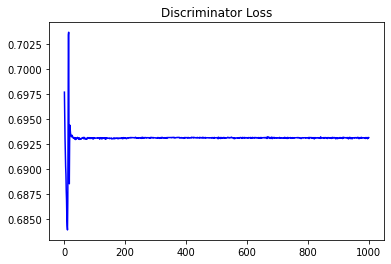

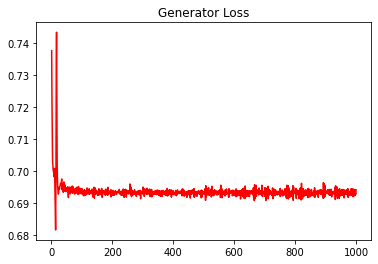

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.18041913909627305


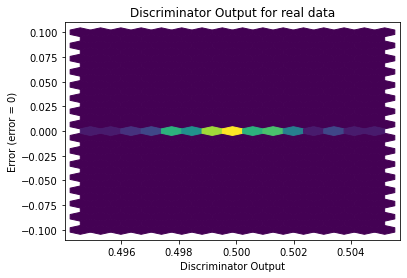

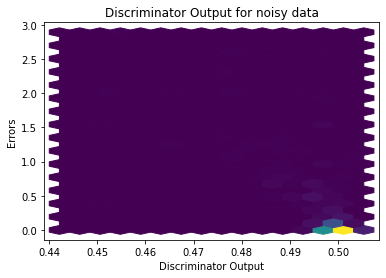

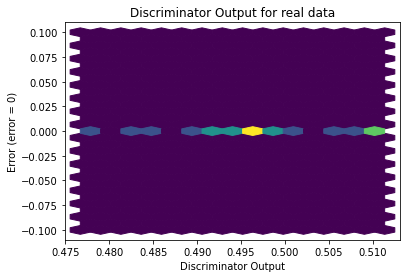

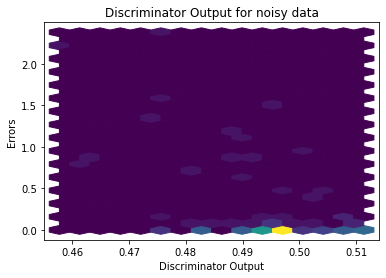

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


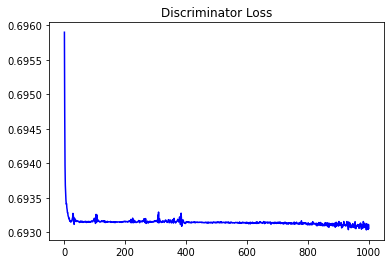

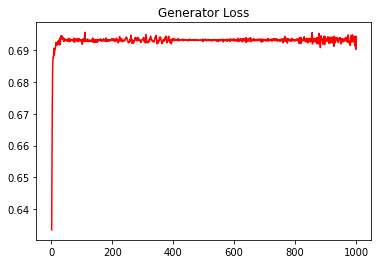

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.23790172279468988


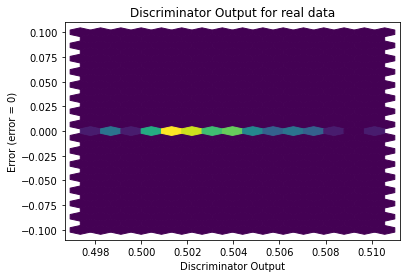

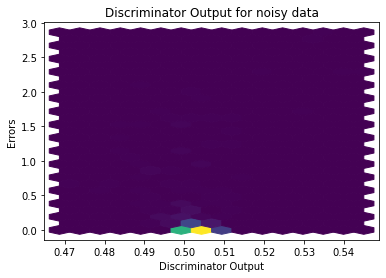

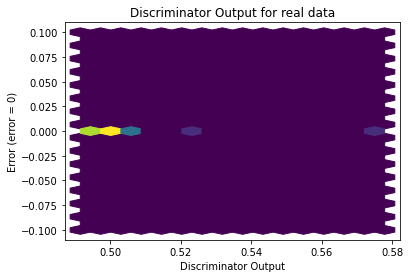

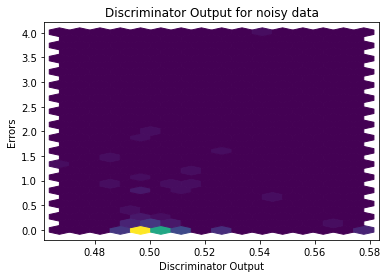

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
